<a href="https://colab.research.google.com/github/Antique-1/machine-learning-practice/blob/main/250528_rnn_attention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 시퀀스 배열로 다루는 순환 신경망(RNN)

## 1. LSTM을 이용한 로이터 뉴스 카테고리 분류하기

### 라이브러리 불러오기

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import reuters
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

### 데이터셋 불러오기 및 확인

In [5]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

In [6]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(8982,) (2246,)
(8982,) (2246,)


In [7]:
category = np.max(y_train) + 1 # 0 ~ 45

print(f"카테고리 : {category}개")
print(f"학습용 뉴스 기사 : {len(X_train)}개")
print(f"테스트용 뉴스 기사 : {len(X_test)}개")
print(X_train[0])
print(f"토큰 개수 ex : {len(X_train[0])}, {len(X_train[1])}, {len(X_train[2])}")

카테고리 : 46개
학습용 뉴스 기사 : 8982개
테스트용 뉴스 기사 : 2246개
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
토큰 개수 ex : 87, 56, 139


### 텍스트 전처리

In [8]:
# Padding 적용
X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test = sequence.pad_sequences(X_test, maxlen=100)
print(f"토큰 개수 ex : {len(X_train[0])}, {len(X_train[1])}, {len(X_train[2])}")

토큰 개수 ex : 100, 100, 100


In [9]:
y_train

array([ 3,  4,  3, ..., 25,  3, 25])

In [10]:
# One hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
len(y_train[0])

46

### 모델 생성

확인문제 1 : 빈칸에 들어갈 값을 적으세요

In [12]:
model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(y_train.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(X_train, y_train, batch_size=20, epochs=200, validation_data=(X_test, y_test), callbacks=[early_stopping_callback])

print(f"Test Accuracy: {model.evaluate(X_test, y_test)[1] : .4f}")

Epoch 1/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.3949 - loss: 2.4790 - val_accuracy: 0.5249 - val_loss: 1.8551
Epoch 2/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5344 - loss: 1.8028 - val_accuracy: 0.5717 - val_loss: 1.6656
Epoch 3/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5972 - loss: 1.5785 - val_accuracy: 0.6135 - val_loss: 1.5224
Epoch 4/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6366 - loss: 1.4303 - val_accuracy: 0.6532 - val_loss: 1.3911
Epoch 5/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6749 - loss: 1.2718 - val_accuracy: 0.6670 - val_loss: 1.2921
Epoch 6/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7132 - loss: 1.1197 - val_accuracy: 0.6968 - val_loss: 1.1981
Epoch 7/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.7361 - loss: 1.0349 - val_accuracy: 0.7110 - val_loss: 1.1484
Epoch 8/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7682 - loss: 0.9114 - val_

### 성능 평가 및 시각화

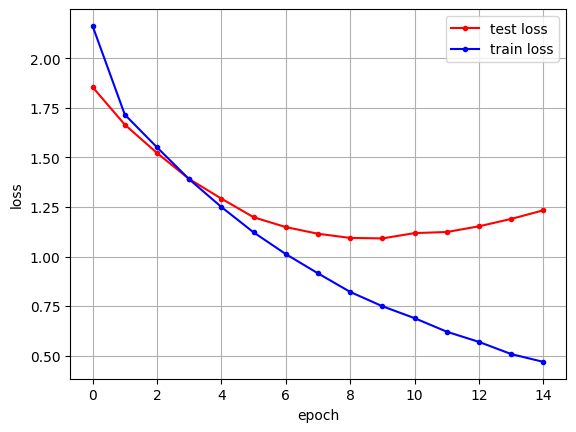

In [13]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='test loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='train loss')

plt.legend()
plt.grid()

plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 2. LSTM과 CNN의 조합을 이용한 영화 리뷰 분류하기

### 라이브러리 불러오기

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

### 데이터 불러오기 및 확인

In [15]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

In [16]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(25000,) (25000,)
(25000,) (25000,)


In [17]:
print(len(X_train[0]), len(X_train[1]), len(X_train[2]))

218 189 141


In [18]:
unique, count = np.unique(y_train, return_counts=True)
print(unique, count)

[0 1] [12500 12500]


In [19]:
unique, count = np.unique(y_test, return_counts=True)
print(unique, count)

[0 1] [12500 12500]


### 텍스트 전처리

In [20]:
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

In [21]:
print(len(X_train[0]), len(X_train[1]), len(X_train[2]))

500 500 500


### 모델 생성

In [42]:
model = Sequential()
model.add(Embedding(5000, 50))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ ?                      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### 모델 학습

In [43]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(X_train, y_train, batch_size=40, epochs=100, validation_split=0.25, callbacks=[early_stopping_callback])

print(f"Test Accuracy: {model.evaluate(X_test, y_test)[1] : .4f}")

Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.6728 - loss: 0.5740 - val_accuracy: 0.8730 - val_loss: 0.2950
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.8951 - loss: 0.2618 - val_accuracy: 0.8842 - val_loss: 0.2690
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9250 - loss: 0.2018 - val_accuracy: 0.8928 - val_loss: 0.2643
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9418 - loss: 0.1639 - val_accuracy: 0.8944 - val_loss: 0.2719
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9509 - loss: 0.1406 - val_accuracy: 0.8834 - val_loss: 0.2915
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9617 - loss: 0.1115 - val_accuracy: 0.8893 - val_loss: 0.3126
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8783 - loss: 0.3357
Test Accuracy:  0.8808


### 성능 평가 및 시각화

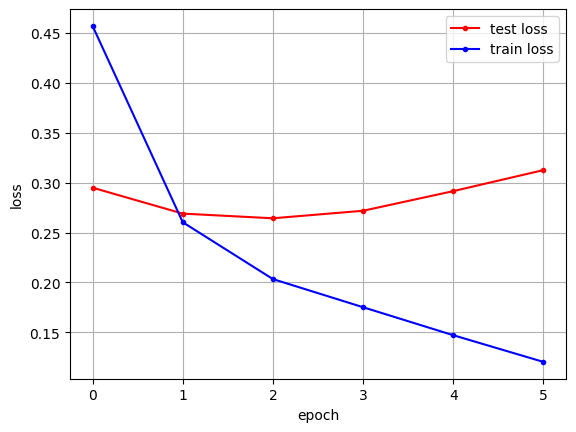

In [44]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='test loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='train loss')

plt.legend()
plt.grid()

plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

확인문제 3 : 모델 수정 및 결과 비교
- 과적합이 발생한 이유에 대해 설명하세요
- Embedding Layer의 출력 벡터 수를 50으로 조정 후 결과를 비교해보세요

 에포크 수가 많고, LSTM 자체의 한계로 복잡한 계산에 무리가 있어 earlt stop이 바로 동작하며 과적합이 발생하였음, 모델에 비해 데이터 수가 적음

 50으로 변경한 결과 로스값 증폭이 더 작아짐

## 3. 어텐션을 사용한 신경망

In [32]:
!pip install keras-self-attention

In [33]:
from tensorflow.keras.layers import Flatten
from tensorflow.keras.utils import plot_model
from keras_self_attention import SeqSelfAttention

### 모델 생성

In [34]:
att_model = Sequential()
att_model.add(Embedding(5000, 500))
att_model.add(Dropout(0.5))
att_model.add(LSTM(64, return_sequences=True))
att_model.add(SeqSelfAttention(attention_activation='sigmoid'))
att_model.add(Dropout(0.5))
att_model.add(Flatten())
att_model.add(Dense(1))
att_model.add(Activation('sigmoid'))

### 모델 학습

In [35]:
att_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

att_history = att_model.fit(X_train, y_train, batch_size=40, epochs=100,  validation_data=(X_test, y_test), callbacks=[early_stopping_callback])

print(f"Test Accuracy: {att_model.evaluate(X_test, y_test)[1] : .4f}")

Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 117s 183ms/step - accuracy: 0.7091 - loss: 0.5044 - val_accuracy: 0.8779 - val_loss: 0.2953
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 141s 182ms/step - accuracy: 0.9210 - loss: 0.2054 - val_accuracy: 0.8980 - val_loss: 0.2485
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 142s 182ms/step - accuracy: 0.9497 - loss: 0.1413 - val_accuracy: 0.8825 - val_loss: 0.3054
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 128s 160ms/step - accuracy: 0.9603 - loss: 0.1083 - val_accuracy: 0.8829 - val_loss: 0.3392
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 99s 159ms/step - accuracy: 0.9752 - loss: 0.0720 - val_accuracy: 0.8742 - val_loss: 0.4164
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accuracy: 0.8732 - loss: 0.4140
Test Accuracy:  0.8742


### 성능 평가 및 시각화

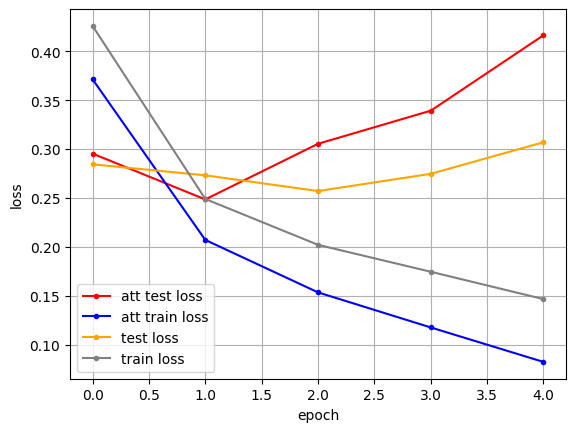

In [36]:
att_y_vloss = att_history.history['val_loss']
att_y_loss = att_history.history['loss']

x_len = np.arange(len(att_y_loss))
plt.plot(x_len, att_y_vloss, marker='.', c="red", label='att test loss')
plt.plot(x_len, att_y_loss, marker='.', c="blue", label='att train loss')
plt.plot(x_len, y_vloss[0:5], marker='.', c="orange", label='test loss')
plt.plot(x_len, y_loss[0:5], marker='.', c="gray", label='train loss')

plt.legend()
plt.grid()

plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

확인문제 2 : LSTM + CNN 모델과 어텐션 모델의 결과를 비교하고 이유를 설명하세요

1번쨰 에포크 기준으로 att 모델을 적용시킨 데이터의 손실값이 더 적게 나타나 att를 적용한 모델이 더 좋은 성능을 보인다